<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025/blob/main/FICCD_Claudomiro_ativ_04_Py_Pvalue_Confidence_intervals__Correlation_Raimunda_Branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 4 - Programas em Python for p-value, confidence intervals e correlation
](https://docs.google.com/presentation/d/1_977fbETw-RssZ-BXxPrRiA0lUUvPgfgItCa5ieE7Lc/edit#slide=id.p)**

**Belém, 12 de maio de 2025.**

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import linregress, ttest_ind
import kagglehub as kh

#####**A) Correlação**

Faça plotes similares as duas figuras mostradas nos dois próximos slides.

Cada uma deve ter 9 pontos. A segunda deve ter seus dados gerados aleatoriamente com uma distribuição uniforme no mesmo intervalo da primeira.

Use a função linregress para achar um reta que represente os dados e também para calcular o p-value. Interprete os resultados. Pesquise sobre a função linregress.

Calcule a covariância e interprete os resultados.

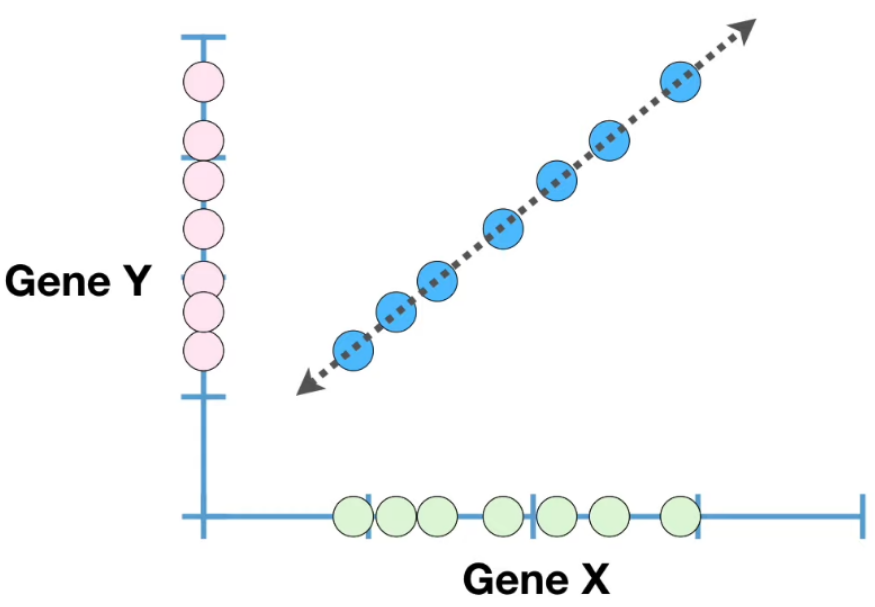

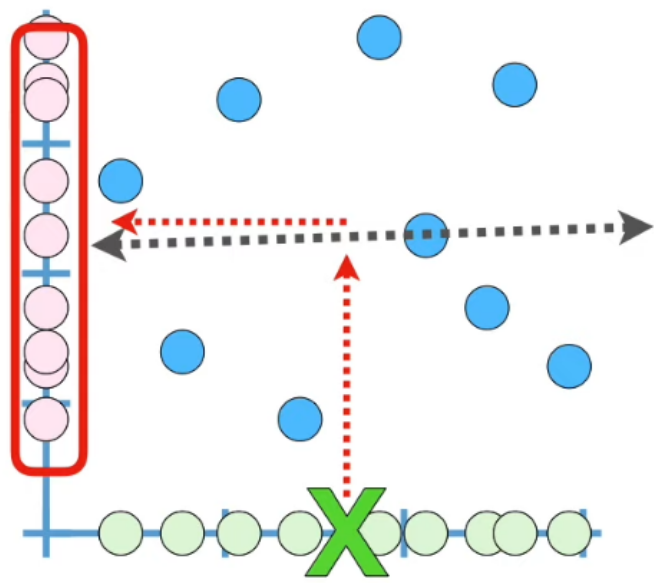

P-value:  3.292585384803146e-70
Covariância:  7.5


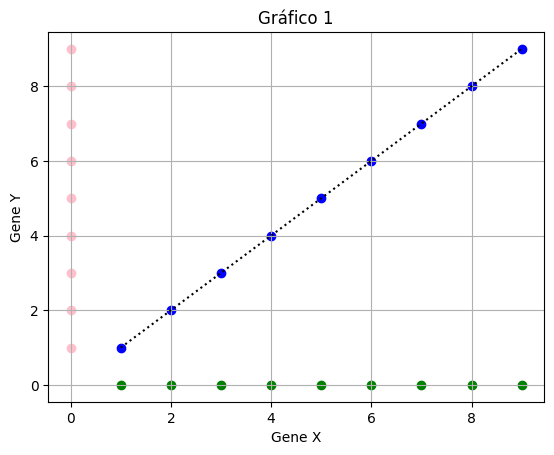

In [50]:
# A) Correlação

# Primeiro gráfico:

x = np.arange(1, 10)
y = np.arange(1, 10)

# Regressão linear
slope, intercept, rvalue, pvalue, std_slope  = linregress(x, y)
x_linha = np.linspace(1, 9)
y_linha = slope * x_linha + intercept

# Covariância entre x e y
covariancia_matrix = np.cov(x, y)
covariancia = covariancia_matrix[0, 1]

print("P-value: ", pvalue)
print("Covariância: ", covariancia)

# Gráfico
fig, ax = plt.subplots()

# Regressão linear
ax.plot(x_linha, y_linha, color='black', linestyle='dotted')

# Pontos
ax.scatter(x, [0]*len(x), color='green')
ax.scatter([0]*len(y), y, color='pink')
ax.scatter(x, y, color='blue')

# Rótulos e legenda
ax.set_xlabel('Gene X')
ax.set_ylabel('Gene Y')
ax.set_title('Gráfico 1')

plt.grid(True)
plt.show()

P-value: 0.5990615251315202
Covariância: 1.4267633510535023


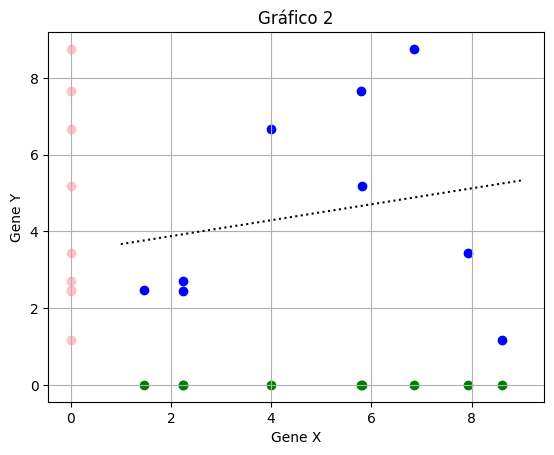

In [51]:
# A) Correlação

# Segundo gráfico:

np.random.seed(42)
x2 = np.random.uniform(1, 9, 9)
y2 = np.random.uniform(1, 9, 9)

# Regressão linear
slope2, intercept2, rvalue2, pvalue2, std_slope2 = linregress(x2, y2)
x_linha2 = np.linspace(1, 9)
y_linha2 = slope2 * x_linha2 + intercept2

# Covariância entre x e y
covariancia_matrix2 = np.cov(x2, y2)
covariancia2 = covariancia_matrix2[0, 1]

print("P-value:", pvalue2)
print("Covariância:", covariancia2)

# Gráfico
fig, ax = plt.subplots()

# Reta de regressão
ax.plot(x_linha2, y_linha2, color='black', linestyle='dotted')

# Pontos nos eixos
ax.scatter(x2, [0]*len(x2), color='green')
ax.scatter([0]*len(y2), y2, color='pink')

# Pontos principais
ax.scatter(x2, y2, color='blue')

# Rótulos e título
ax.set_xlabel('Gene X')
ax.set_ylabel('Gene Y')
ax.set_title('Gráfico 2')

plt.grid(True)
plt.show()

Regressão linear é uma equação para se estimar o valor esperado de uma variável y, dados os valores de outras variáveis x.

scipy.stats.linregress calculates the linear least-squares regression for two sets of measurements. It is a function within the SciPy library in Python, used for statistical computations. This function is particularly useful for finding the best-fit line through a set of data points, allowing for the analysis of relationships between two variables.

The basic syntax for using linregress is:

```
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
```


Here, x and y are arrays or lists representing the two sets of measurements. The function returns several values:

* slope: The slope of the regression line.
* intercept: The intercept of the regression line.
* r_value: The Pearson correlation coefficient, indicating the strength and direction of the linear relationship.
* p_value: The p-value for a hypothesis test where the null hypothesis is that the slope is zero.
* std_err: The standard error of the estimated slope.

linregress can be used in various applications, such as analyzing experimental data, identifying trends, and making predictions based on linear relationships.


**Gráfico 1:**
* P-value:  3.292585384803146e-70
* Covariância:  7.5

P-value próximo de zero mostra uma significância estatística alta e indica que há uma correlação linear bastante significativa entre x e y.

Covariância positiva indica que as variáveis x e y variam juntas e indica uma forte relação linear crescente.

**Gráfico 2:**
* P-value: 0.5990615251315202
* Covariância: 1.4267633510535023

P-value > 5% indica que não há significância estatítica suficiente para dizer que há uma correlação linear entre x e y (pode ter sido uma situaação aleatória).

Covariância menor que no gráfico 1 sugerindo que possivelmente há uma fraca correlação entre as variáveis.





#####**B) Estimando um Intervalo de Confiança para a Média**

Obtenha um conjunto de dados amostrais (por exemplo, pesos de indivíduos, notas de testes, etc.).

Calcule o intervalo de confiança de 95% para a média da população seguindo os passos:
* Calcular a média e o desvio padrão da amostra.
* Usar a fórmula para intervalo de confiança ou a biblioteca scipy.stats.

Desafio: Repetir o processo para diferentes níveis de confiança (por exemplo, 90%, 99%) e comparar os resultados.

Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.

Contexto do **[Dataset](https://www.kaggle.com/datasets/lauroliveira/enem-2019-dados-tratados/data)**:

Proposta: Análise de dados da Secretaria de Educação.


* Como foi a performance dos alunos em 2019 no Enem?

* Dados reais de todos os inscritos do ENEM de 2019, para entender como os alunos performaram e extrair informações e insights tal que a Secretária de Educação possa agir e aconselhar as escolas na metodologia ou no foco do ensino.

* A Secretaria selecionou algumas informações (classes e features) que julgou reviamente como mais importantes.

* Os dados em csv estão tratados e possuem mais de 5 milhões de linhas e 21 colunas ao todo.

In [52]:
# Dataset from Kaggle
path = kh.dataset_download('lauroliveira/enem-2019-dados-tratados')
print('Path to dataset files:', path)

data = pd.read_csv(path + '/enem_2019.csv')
#data.head()

Path to dataset files: /kaggle/input/enem-2019-dados-tratados


In [53]:
# B) Estimando um Intervalo de Confiança para a Média

# Usando apenas as notas de matemática
notas_matematica = data['nota_mt']

#np.random.seed(42)
amostra = notas_matematica.sample(n=100)

# Calcular a média e o desvio padrão da amostra:
media_amostra = amostra.mean()
std_amostra = amostra.std(ddof=1)

print(f"Média da amostra: {media_amostra:.2f}")
print(f"Desvio padrão da amostra: {std_amostra:.2f}")

# Usandop a biblioteca scipy.stats para calcular o intervalo de confiança = 95%
intervalo1 = stats.t.interval(
    confidence = 0.95,
    df = len(amostra)-1,
    loc = media_amostra,
    scale = std_amostra / np.sqrt(len(amostra))
)
print(f"\nIntervalo de confiança 95%: ({intervalo1[0]:.2f}, {intervalo1[1]:.2f})\n")

# Desafio
intervalos = []
niveis_confianca = [0.90, 0.92, 0.94, 0.95, 0.98, 0.99]

# Cálculo dos intervalos
for nivel in niveis_confianca:
  intervalo = stats.t.interval(
    confidence=nivel,
    df=len(amostra)-1,
    loc=media_amostra,
    scale=std_amostra / np.sqrt(len(amostra))
  )
  intervalos.append(intervalo)
  print(f"Intervalo de confiança {int(nivel*100)}%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

import matplotlib.pyplot as plt
from scipy import stats

# Níveis de confiança desejados
niveis = [0.90, 0.92, 0.94, 0.95, 0.98, 0.99]

# Preparar dados para plot
inferiores = []
superiores = []
labels = []

for nivel in niveis:
    intervalo = stats.t.interval(confidence=nivel, df=len(amostra)-1, loc=media_amostra, scale=std_amostra / np.sqrt(len(amostra)))
    inferiores.append(intervalo[0])
    superiores.append(intervalo[1])
    labels.append(f'{int(nivel*100)}%')

Média da amostra: 538.54
Desvio padrão da amostra: 126.82

Intervalo de confiança 95%: (513.37, 563.70)

Intervalo de confiança 90%: (517.48, 559.59)
Intervalo de confiança 92%: (516.10, 560.97)
Intervalo de confiança 94%: (514.41, 562.66)
Intervalo de confiança 95%: (513.37, 563.70)
Intervalo de confiança 98%: (508.55, 568.52)
Intervalo de confiança 99%: (505.23, 571.84)


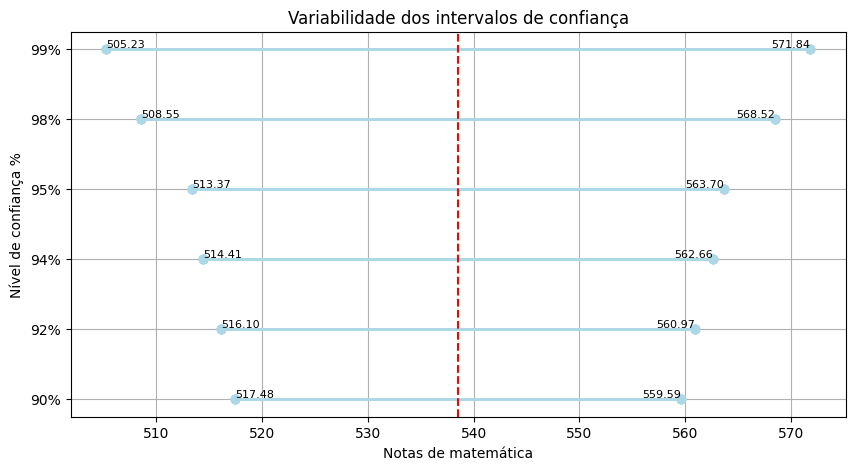

In [54]:
# Visualizar os intervalos de confiança em um gráfico usando matplotlib para mostrar a variabilidade.
y_posicoes = np.arange(len(niveis_confianca))
rotulos = [f'{int(n*100)}%' for n in niveis_confianca]

plt.figure(figsize=(10, 5))

# Separar limites inferiores e superiores
# inferiores, superiores = zip(*intervalos)
for i in range(len(y_posicoes)):
  inferior =inferiores[i]
  superior = superiores[i]
  y = y_posicoes[i]
  # Plotar linha
  plt.plot([inferiores, superiores], [y_posicoes, y_posicoes], marker='o', color='lightblue', lw=2)

  # Legendas dos marcadores
  plt.text(inferior, y, f'{inferior:.2f}', ha='left', va='bottom', color='black', fontsize=8)
  plt.text(superior, y, f'{superior:.2f}', ha='right', va='bottom', color='black', fontsize=8)

# Linha da mádia
plt.axvline(media_amostra, color='red', linestyle='--')

plt.yticks(ticks=y_posicoes, labels=rotulos)
plt.xlabel('Notas de matemática')
plt.ylabel('Nível de confiança %')
plt.title('Variabilidade dos intervalos de confiança')
plt.grid(True)
plt.show()

#####**C) P-value em um Teste de Hipótese**

* Forneça dois conjuntos de dados: um para um grupo de controle e outro para um grupo de teste.
* Formule a hipótese nula.
* Realizar um teste t de duas amostras usando scipy.stats.ttest_ind.

Interpretar o p-value resultante e decidir se rejeitam a hipótese nula em um nível de significância dado (por exemplo, 0,05).


H₀ = não tem diferença entre as médias das notas de matemática entre participantes do sexo feminino e masculino.

In [55]:
# Participantes F e M com nota matemática válida
notas_mt2 = data[(data['nota_mt'].notnull()) & (data['sexo'].isin(['M', 'F']))]

# Dois conjuntos de dados (controle e teste)
grupo_controle_F = notas_mt2[notas_mt2['sexo'] == 'F']['nota_mt']
grupo_teste_M = notas_mt2[notas_mt2['sexo'] == 'M']['nota_mt']

# Realizar o teste t
stat, p_value = ttest_ind(grupo_controle_F, grupo_teste_M)

print('Teste t: ', stat)
print('P-value: ', p_value)

# Nível de significância
if p_value < 0.05:
    print('\nRejeita-se H₀: há diferença entre participantes do sexo feminino e masculino.')
else:
    print('NÃO rejeita-se H₀: não tem evidência de diferença entre participantes do sexo feminino e masculino..')

Teste t:  -369.15670694091006
P-value:  0.0

Rejeita-se H₀: há diferença entre participantes do sexo feminino e masculino.


H₀ = não tem diferença entre as médias das notas de matemática entre pariticipantes com 25 e 26 anos de idade.

In [56]:
# Participantes de 25 e 26 anos com nota de matemática válida
notas_mt2 = data[(data['nota_mt'].notnull()) & ((data['idade'] == 25) | (data['idade'] == 26))]

# Dois conjuntos de dados (controle e teste)
grupo_controle_25 = notas_mt2[notas_mt2['idade'] == 25]['nota_mt']
grupo_teste_26 = notas_mt2[notas_mt2['idade'] == 26]['nota_mt']

# Realizar o teste t
stat, p_value = ttest_ind(grupo_controle_25, grupo_teste_26)

print('Teste t: ', stat)
print('P-value: ', p_value)

# Nível de significância
if p_value < 0.05:
    print('\nRejeita-se H₀: há diferença na média das notas de matemática entre participantes de 25 e 26.')
else:
    print('\nNÃO rejeita-se H₀: não tem evidência de diferença na média das notas de matemática entre participantes com 25 e com 26 anos.')


Teste t:  -0.956576756118643
P-value:  0.3387826573230882

NÃO rejeita-se H₀: não tem evidência de diferença na média das notas de matemática entre participantes com 25 e com 26 anos.


#####**D) Significance_level**

Faça slides explicando o código abaixo e interpretando os resultados

https://colab.research.google.com/drive/13V7IT7XbnNVf4VVehObHO6NZUxaqdl_f?usp=sharing

Teste com dois valores para significance_level
Pelo menos quatro slides com a explicação e interpretação.

#####**E) Reproduzindo slides em código**

https://docs.google.com/presentation/d/1gMKonLnK3buDUGGJGt1AAS-Ki3jT93LZ/edit?usp=sharing&ouid=106518696571208942024&rtpof=true&sd=true

Reproduza em Python o conteúdo dos slides de 24 a 46.